# Examples

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastsst import SingularSpectrumTransformation

In [2]:
np.random.seed(123)

In [3]:
def plot_data_and_score(raw_data,score):
    f,ax = plt.subplots(2,1,figsize=(20,10))
    ax[0].plot(raw_data); ax[0].set_title("raw data")
    ax[1].plot(score,"r"); ax[1].set_title("score")

## Synthetic data

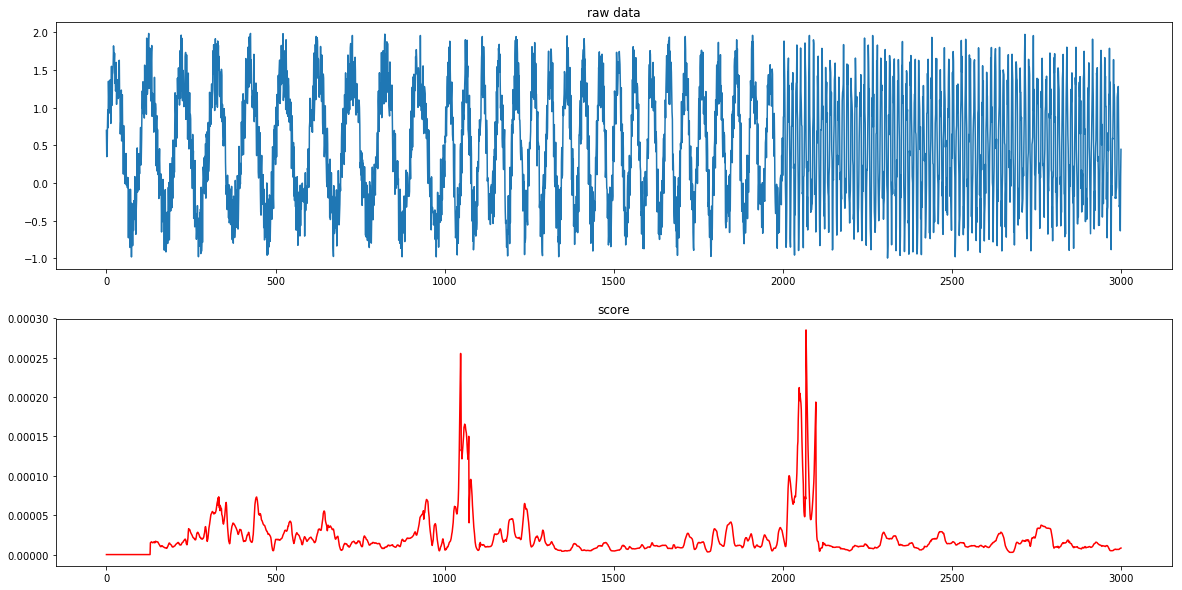

In [4]:
# synthetic (frequency change)
x0 = np.sin(2*np.pi*1*np.linspace(0,10,1000))
x1 = np.sin(2*np.pi*2*np.linspace(0,10,1000))
x2 = np.sin(2*np.pi*8*np.linspace(0,10,1000))
x = np.hstack([x0,x1,x2])
x +=  + np.random.rand(x.size)

score = SingularSpectrumTransformation(win_length=60,order=60,lag=10).score_offline(x)
plot_data_and_score(x,score)

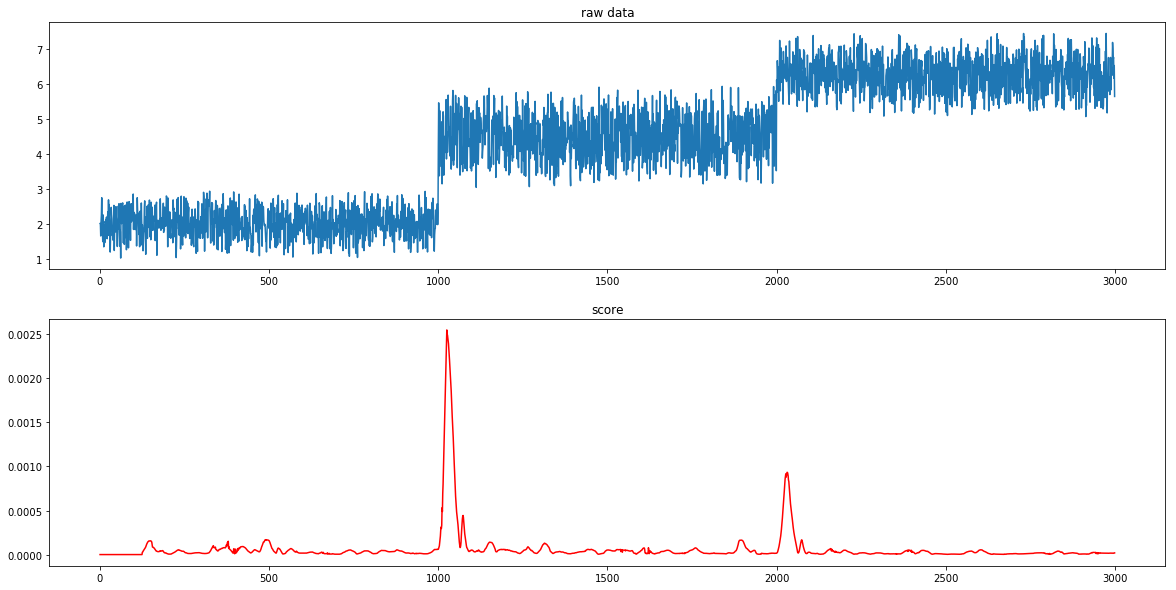

In [5]:
# synthetic (step function)
x0 = 1 * np.ones(1000) + np.random.rand(1000) * 1
x1 = 3 * np.ones(1000) + np.random.rand(1000) * 2
x2 = 5 * np.ones(1000) + np.random.rand(1000) * 1.5
x = np.hstack([x0,x1,x2])
x +=  + np.random.rand(x.size)

score = SingularSpectrumTransformation(win_length=50).score_offline(x)
plot_data_and_score(x,score)

## Real data
data source: http://www.cs.ucr.edu/~eamonn/discords/

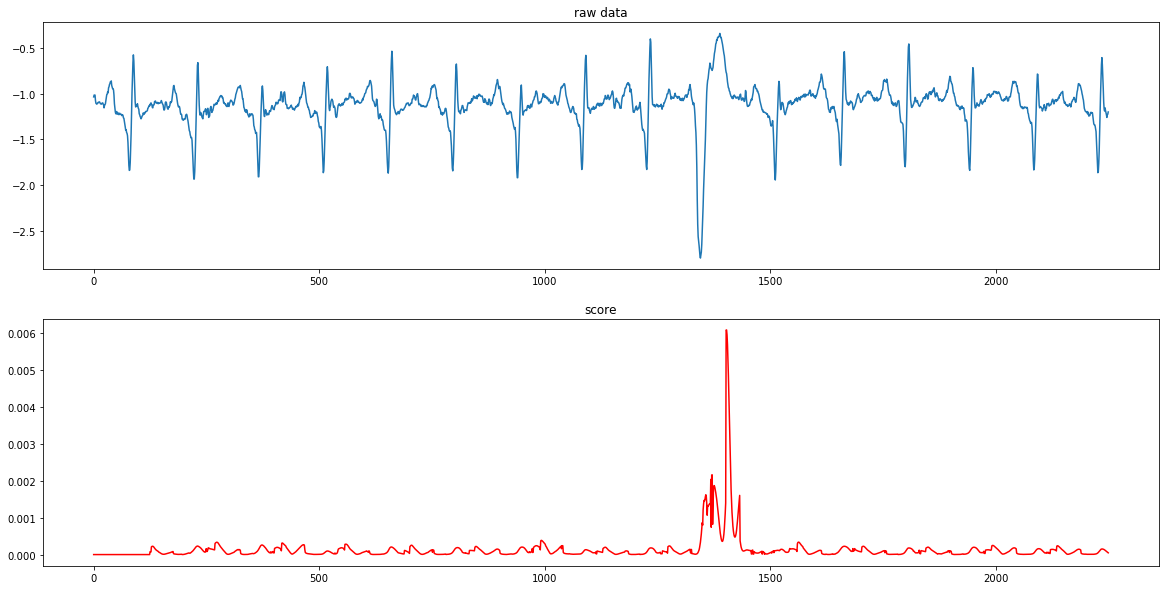

In [10]:
# ECG data 1
x = pd.read_csv("data/chfdb_chf13_45590.txt",header=None,delimiter="\t").values[:,1][1500:]
sst = SingularSpectrumTransformation(win_length=50,order=50)
score = sst.score_offline(x)

plot_data_and_score(x,score)

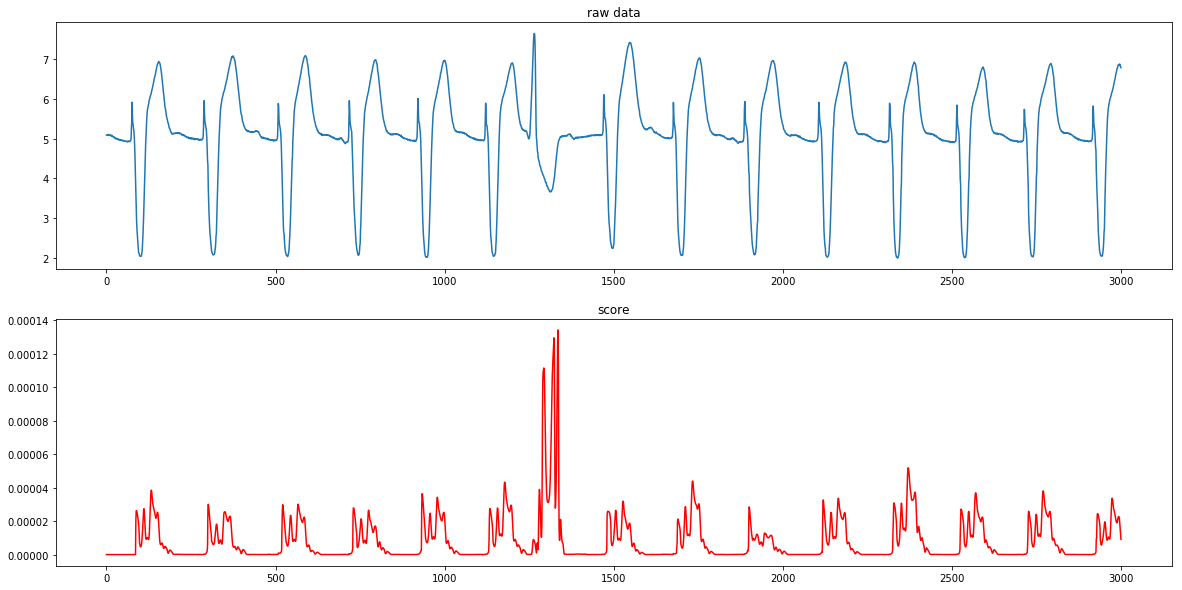

In [12]:
#ECG data 2
x = pd.read_csv("data/qtdbsel102.txt",header=None,delimiter="\t").values[:,2][3000:6000]
sst = SingularSpectrumTransformation(win_length=50,order=25,lag=12,n_components=2,is_scaled=False,use_lanczos=False)
score = sst.score_offline(x)

plot_data_and_score(x,score)

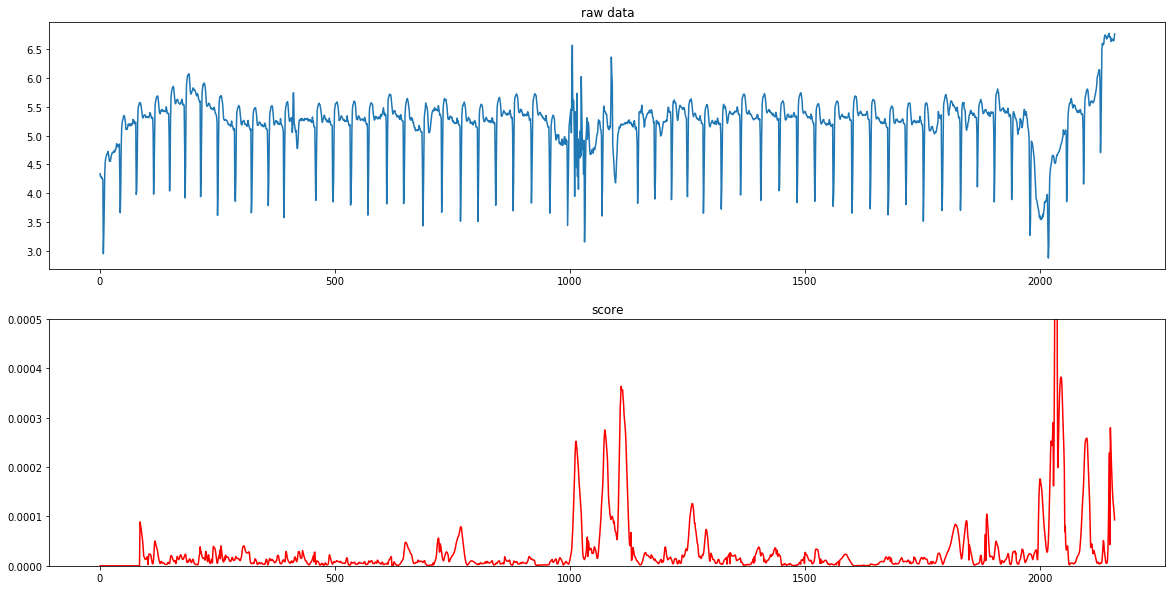

In [13]:
# ECG data 3
x = pd.read_csv("data/mitdbx_mitdbx_108.txt",header=None,delimiter="\s\s",engine="python").values[:,2][::10]
sst = SingularSpectrumTransformation(win_length=40,order=30)
score = sst.score_offline(x)

plot_data_and_score(x,score)
plt.ylim(0,0.0005);

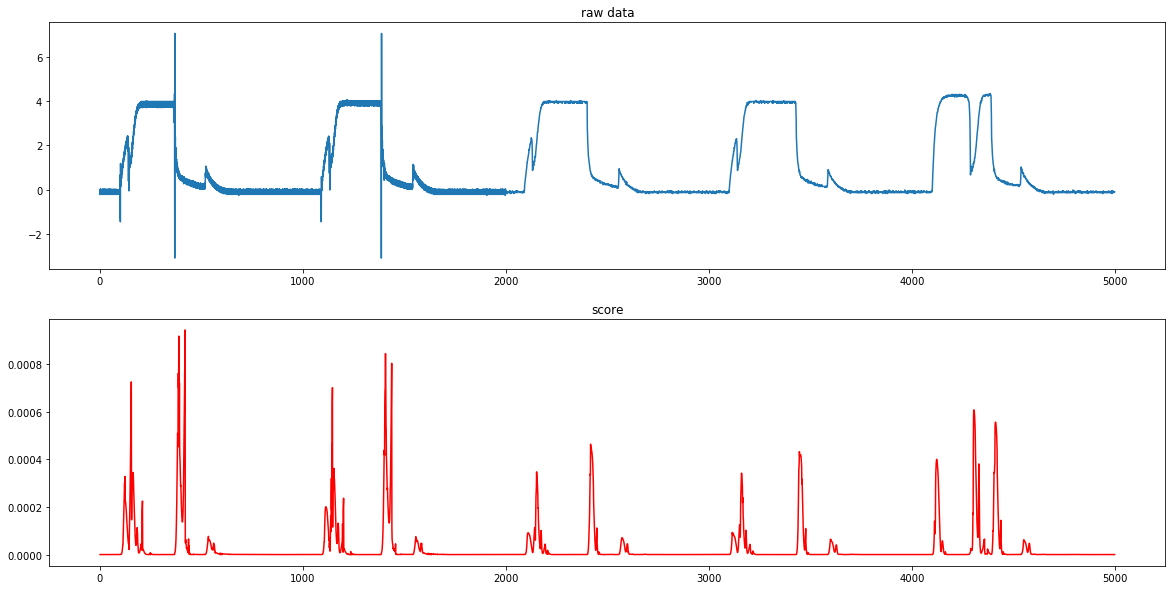

In [68]:
#Spase Shuttle data
x = pd.read_csv("data/TEK16.txt",header=None,delimiter="\t").values[:,0]
sst = SingularSpectrumTransformation(win_length=30)
score = sst.score_offline(x)

plot_data_and_score(x,score)

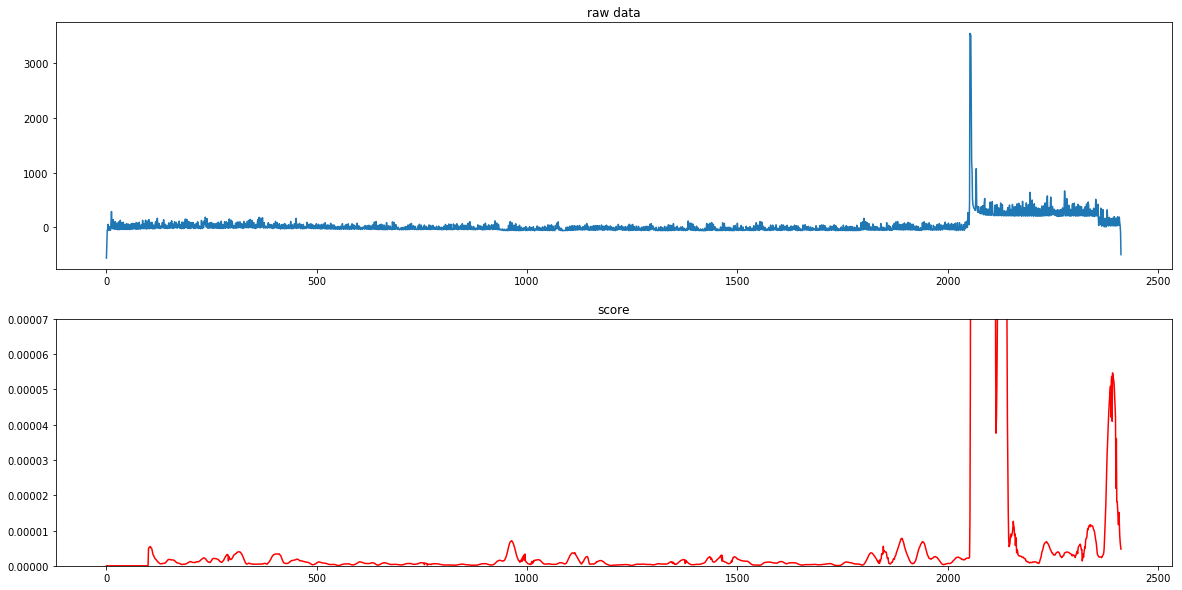

In [99]:
# respiration data
x = pd.read_csv("data/nprs44.txt",header=None,delimiter="\t").values[:,0][::10]
sst = SingularSpectrumTransformation(win_length=40)
score = sst.score_offline(x)

plot_data_and_score(x,score)
plt.ylim(0,0.00007);

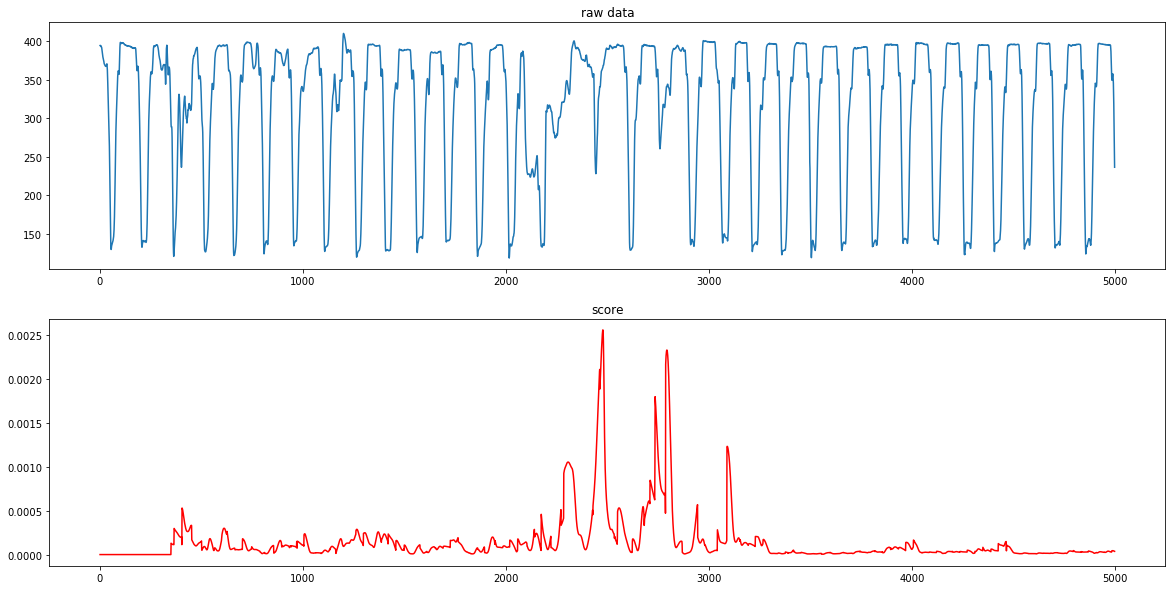

In [106]:
# video surveillance data
x = pd.read_csv("data/ann_gun_CentroidA.txt",header=None,delimiter="\s\s",engine="python").values[:5000,1]
sst = SingularSpectrumTransformation(win_length=140)
score = sst.score_offline(x)

plot_data_and_score(x,score)